In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet 
import pandas as pd

In [4]:
def plot_grey(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image , cmap='Greys_r')

In [5]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

In [6]:
image = cv2.imread('bill.png',cv2.IMREAD_GRAYSCALE)

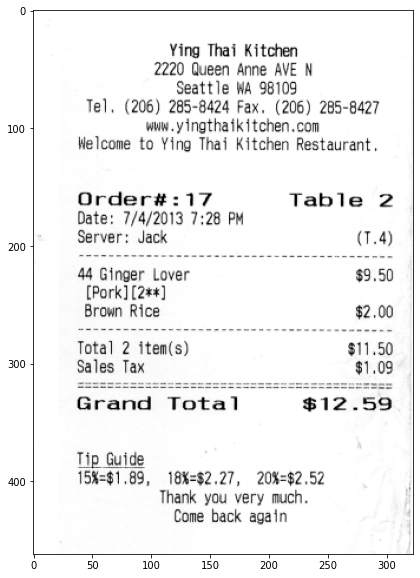

In [7]:
plot_grey(image)

In [8]:
d = pytesseract.image_to_data(image , output_type=pytesseract.Output.DICT)

In [9]:
n_boxes = len(d['level'])

In [10]:
print(n_boxes)

106


In [11]:
boxes = cv2.cvtColor(image.copy() , cv2.COLOR_BGR2RGB)

In [12]:
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

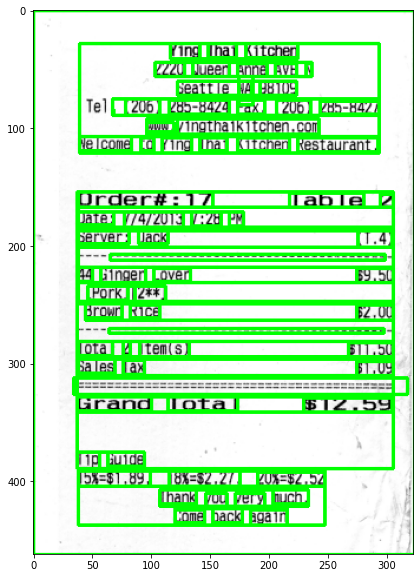

In [13]:
plot_rgb(boxes)

In [14]:
extracted_text = pytesseract.image_to_string(image).lower()
print(extracted_text)


ying thai kitchen
2220 queen anne ave n
seattle wa 98109
« (206) 285-8424 fax. (206) 285-8427
‘uw .yingthaikitchen.com
welcome to ying thai kitchen restaurant.

order#:17 table 2
date: 7/4/2013 7:28 pm

server: jack (1.4)
44 ginger lover $9.50
[pork] [24#]

brown rice $2.00
total 2 iten(s) $11.50
sales tax $1.09
grand total $12.59
tip guide

tek=$1.89, 18%=$2.27, 20%=82.52
thank you very much,
cone back again



In [15]:
#lets find the total price of bill and date

def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

def find_date(text):
    match = re.findall(r'\d+[/.-]\S+[/.-]\d+', text)
    st = ' '
    st= st.join(match)
    return st

In [16]:
amounts = find_amounts(extracted_text)
bill_date =  find_date(extracted_text)
total = max(amounts)
print(total , bill_date)

82.52 7/4/2013


In [17]:
nltk.download('punkt' , quiet=True)
nltk.download('wordnet' , quiet=True)


True

In [18]:
# extract the title
sent_tokens = nltk.sent_tokenize(extracted_text)
title = sent_tokens[0].splitlines()[0]
print('Title is : ' , title)

Title is :  ying thai kitchen


In [19]:
# tokenize and seach for key words
#remove puncution
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(extracted_text)
print(new_words)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'to', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', 's', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '2', '27', '20', '82', '52', 'thank', 'you', 'very', 'much', 'cone', 'back', 'again']


In [20]:
# there are stop words like a , an the etc... we have to remove them also
nltk.download('stopwords', quiet=True)
stop_words = set(nltk.corpus.stopwords.words('english')) 
print(stop_words)

{'what', "won't", 'hadn', "haven't", 'which', 'have', 'where', 'his', 'it', "needn't", 'most', 'haven', 'own', "shan't", 'the', 'those', 'needn', 'then', 'mustn', 'all', 'that', 'll', 'm', 've', 'ourselves', 'me', 'yours', 'and', 'below', 'before', 'couldn', 'with', 'than', 'wasn', 'its', 'to', 'about', 'were', 'if', 'himself', 's', 'just', 'at', 'on', "mightn't", "should've", 'under', 'for', 'isn', "you've", 'does', 'shouldn', 'o', 't', 'has', "couldn't", 'during', 'mightn', 'doesn', 'these', 'she', "doesn't", 'again', 'same', 'themselves', 'in', 'you', 'do', "you're", 'while', "that'll", 'a', 'yourselves', 'will', 'both', "you'll", 'into', 'such', 'very', 'against', 'won', 'above', 'ma', 'my', 'don', "isn't", "wasn't", 'further', 'only', 'being', 'itself', 'should', 'did', 'but', 'now', "aren't", 'had', 'theirs', 'as', "it's", 'through', 'down', 'y', "don't", 'each', 'am', 'or', 'too', 're', 'more', 'other', 'there', 'few', "didn't", 'until', 'between', "shouldn't", 'myself', 'weren'

In [21]:
#filter the list by removeing the stop words
filtered_list =  [w for w in new_words if w not in stop_words]
print(filtered_list)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '2', '27', '20', '82', '52', 'thank', 'much', 'cone', 'back']


In [22]:
# download for categorizatio
nltk.download('omw-1.4' , quiet=True)

True

In [23]:
#entertainment
entertainment=[]
for syn in wordnet.synsets('entertainment'):
    for l in syn.lemmas():
        entertainment.append(l.name())
l=['happy','restaurant','food','kitchen','hotel','room','park','movie','cinema','popcorn','combo meal']
entertainment=entertainment+l
print(entertainment)

['entertainment', 'amusement', 'happy', 'restaurant', 'food', 'kitchen', 'hotel', 'room', 'park', 'movie', 'cinema', 'popcorn', 'combo meal']


In [24]:
#home utility
home_utility=[]
for syn in wordnet.synsets('home'):
    for l in syn.lemmas():
        home_utility.append(l.name())
l2=['internet','telephone','elecricity','meter','wifi','broadband','consumer','reading','gas','water','postpaid','prepaid']
home_utility+=l2
print(home_utility)

['home', 'place', 'dwelling', 'home', 'domicile', 'abode', 'habitation', 'dwelling_house', 'home', 'home_plate', 'home_base', 'home', 'plate', 'base', 'home', 'home', 'home', 'family', 'household', 'house', 'home', 'menage', 'home', 'nursing_home', 'rest_home', 'home', 'home', 'home', 'home', 'home', 'interior', 'internal', 'national', 'home', 'home', 'home', 'internet', 'telephone', 'elecricity', 'meter', 'wifi', 'broadband', 'consumer', 'reading', 'gas', 'water', 'postpaid', 'prepaid']


In [25]:
#grocery
 
grocery=[] 
for syn in wordnet.synsets("grocery"): 
    for l in syn.lemmas(): 
         grocery.append(l.name())
l3=['bigbasket','milk','atta','sugar','suflower','oil','bread','vegetabe','fruit','salt','paneer']
grocery+=l3
print(grocery)

['grocery_store', 'grocery', 'food_market', 'market', 'grocery', 'foodstuff', 'bigbasket', 'milk', 'atta', 'sugar', 'suflower', 'oil', 'bread', 'vegetabe', 'fruit', 'salt', 'paneer']


In [26]:
#investment
investment=[] 
for syn in wordnet.synsets("investment"): 
    for l in syn.lemmas(): 
         investment.append(l.name()) 
l1=['endowment','grant','loan','applicant','income','expenditure','profit','interest','expense','finance','property','money','fixed','deposit','kissan','vikas']
investment=investment+l1
print(investment)

['investing', 'investment', 'investment', 'investment_funds', 'investment', 'investment', 'investment', 'investment', 'investiture', 'endowment', 'grant', 'loan', 'applicant', 'income', 'expenditure', 'profit', 'interest', 'expense', 'finance', 'property', 'money', 'fixed', 'deposit', 'kissan', 'vikas']


In [27]:
#travel and transportation
transport=[]
for syn in wordnet.synsets("car"): 
    for l in syn.lemmas(): 
         transport.append(l.name()) 
l4=['cab','ola','uber','autorickshaw','railway','air','emirates','aerofloat','taxi','booking','road','highway']
transport+=l4
print(transport)

['car', 'auto', 'automobile', 'machine', 'motorcar', 'car', 'railcar', 'railway_car', 'railroad_car', 'car', 'gondola', 'car', 'elevator_car', 'cable_car', 'car', 'cab', 'ola', 'uber', 'autorickshaw', 'railway', 'air', 'emirates', 'aerofloat', 'taxi', 'booking', 'road', 'highway']


In [28]:
#shopping
shopping=[]
for syn in wordnet.synsets("dress"): 
    for l in syn.lemmas(): 
         shopping.append(l.name()) 
l4=['iphone','laptop','saree','max','pantaloons','westside','vedic','makeup','lipstick','cosmetics','mac','facewash','heels','crocs','footwear','purse']
shopping+=l4
print(shopping)

['dress', 'frock', 'attire', 'garb', 'dress', 'apparel', 'wearing_apparel', 'dress', 'clothes', 'dress', 'get_dressed', 'dress', 'clothe', 'enclothe', 'garb', 'raiment', 'tog', 'garment', 'habilitate', 'fit_out', 'apparel', 'dress', 'dress', 'dress_up', 'preen', 'primp', 'plume', 'dress', 'dress', 'dress_out', 'dress', 'line_up', 'trim', 'garnish', 'dress', 'dress', 'decorate', 'dress', 'snip', 'clip', 'crop', 'trim', 'lop', 'dress', 'prune', 'cut_back', 'dress', 'dress', 'dress', 'dress', 'groom', 'curry', 'dress', 'arrange', 'set', 'do', 'coif', 'coiffe', 'coiffure', 'full-dress', 'dress', 'dress', 'full-dress', 'iphone', 'laptop', 'saree', 'max', 'pantaloons', 'westside', 'vedic', 'makeup', 'lipstick', 'cosmetics', 'mac', 'facewash', 'heels', 'crocs', 'footwear', 'purse']


In [29]:
#here we will check that the bill belongs to which category
#we will make that category true.
category = ''
for word in filtered_list:
    if word in entertainment:
        category = 'entertainment'
        break
    elif word in investment:
        category = 'investment'
        break
    elif word in grocery:
        category = 'grocery'
        break
    elif word in shopping:
        category = 'shopping'
        break
    elif word in transport:
        category = 'transport'
        break
    elif word in home_utility:
        category = 'home utility'
        break
    else:
        category = 'Others'
print(category)

entertainment


In [30]:
converted_date = pd.to_datetime(bill_date)
print(f"Bill Date : {converted_date}\nTitle : {title.capitalize()}\nCategory : {category.capitalize()}\nTotal Bill : Rs {total}")

Bill Date : 2013-07-04 00:00:00
Title : Ying thai kitchen
Category : Entertainment
Total Bill : Rs 82.52
